# Importing Required Libraries & Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skp
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD,Adam,RMSprop
from keras.losses import MeanSquaredError,CategoricalCrossentropy
from keras.regularizers import l2

# Reading & Understanding Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/d/riarkulkarni/baseline/baseline.csv
/kaggle/input/pesurrcampusmicompetitionc/sample_submission.csv
/kaggle/input/pesurrcampusmicompetitionc/train.csv
/kaggle/input/pesurrcampusmicompetitionc/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/pesurrcampusmicompetitionc/train.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [4]:
tdf = pd.read_csv('/kaggle/input/pesurrcampusmicompetitionc/test.csv')
tdf.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [5]:
# creating duplicate of test dataset
tdf1 = pd.read_csv('/kaggle/input/pesurrcampusmicompetitionc/test.csv')

In [6]:
df.shape

(8991, 60)

# Analyzing Class Distribution & Imbalance

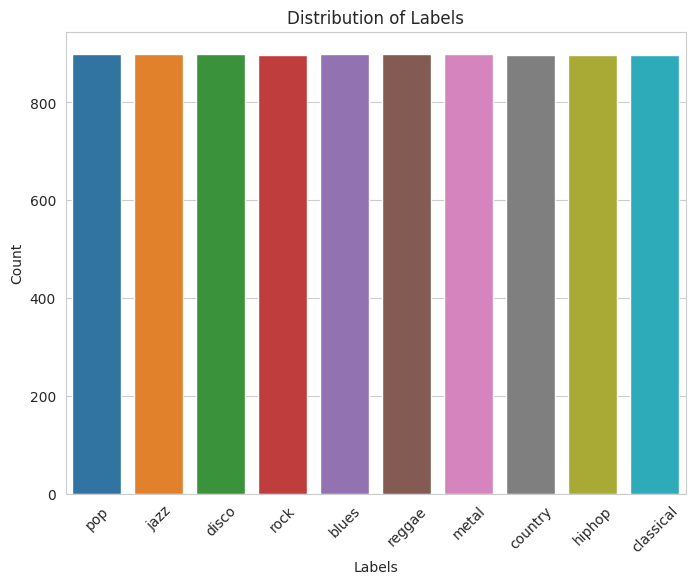

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=45)
plt.show()

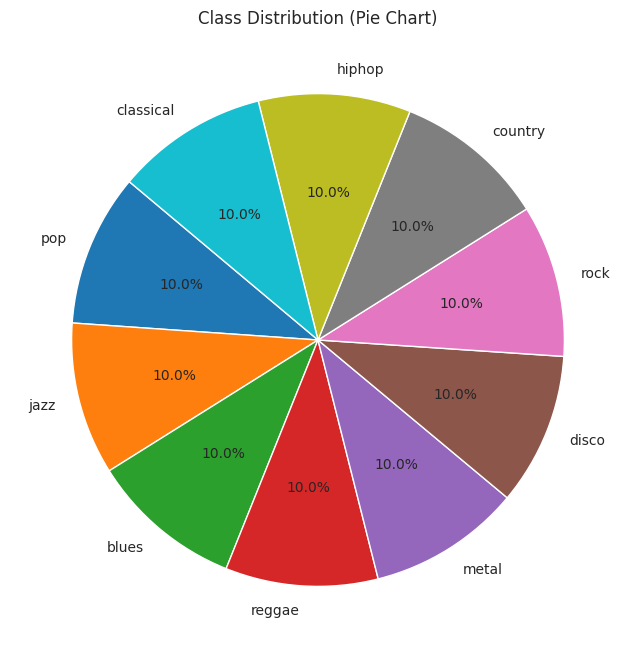

In [8]:
class_counts = df['label'].value_counts()

labels = class_counts.index
counts = class_counts.values

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution (Pie Chart)')
plt.show()

From the above histogram and pie chart, we can infer clearly that the classes are evenly distributed and there is no class imbalance.

# Encoding Label Values to Numeric 

In [9]:
unique_values_labels = df['label'].unique()
print(unique_values_labels)

['pop' 'jazz' 'disco' 'rock' 'blues' 'reggae' 'metal' 'country' 'hiphop'
 'classical']


In [10]:
value_mapping = {
    'blues': 0,  
    'classical': 1,
    'country': 2,
    'disco':3,
    'hiphop':4,
    'jazz':5,
    'metal':6,
    'pop':7,
    'reggae':8,
    'rock':9
}

df['label'] = df['label'].replace(value_mapping)
print(df['label'])

0       7
1       5
2       3
3       9
4       5
       ..
8986    4
8987    1
8988    2
8989    0
8990    2
Name: label, Length: 8991, dtype: int64


In [11]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,7
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,5
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,3
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,9
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,5


As seen, label values have been encoded.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 8991 non-null   object 
 1   length                   8991 non-null   int64  
 2   chroma_stft_mean         8991 non-null   float64
 3   chroma_stft_var          8991 non-null   float64
 4   rms_mean                 8991 non-null   float64
 5   rms_var                  8991 non-null   float64
 6   spectral_centroid_mean   8991 non-null   float64
 7   spectral_centroid_var    8991 non-null   float64
 8   spectral_bandwidth_mean  8991 non-null   float64
 9   spectral_bandwidth_var   8991 non-null   float64
 10  rolloff_mean             8991 non-null   float64
 11  rolloff_var              8991 non-null   float64
 12  zero_crossing_rate_mean  8991 non-null   float64
 13  zero_crossing_rate_var   8991 non-null   float64
 14  harmony_mean            

In [13]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

As seen from above, there are no NULL values.

In [14]:
# creating dataframe minus object data
df1=df.drop('filename',axis=1)

# Feature Analysis

In [15]:
df1

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,2295.327890,301528.295866,4463.253268,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,7
1,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,1532.279764,78968.523547,2657.114446,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,5
2,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,2043.472368,71699.726714,4320.802847,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,3
3,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,2070.706749,62747.206984,4502.841233,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,9
4,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,2351.155395,51753.800714,4473.191669,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,66149,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,2726.496978,230626.501970,5050.944073,...,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213,4
8987,66149,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,1396.738918,95543.330422,885.511569,...,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903,1
8988,66149,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,2714.346339,110427.695082,5024.358849,...,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389,2
8989,66149,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,1800.824216,65413.553514,2491.971342,...,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149,0


In [16]:
correlation_matrix = df1.corr()
genre_correlations = correlation_matrix['label']

In [17]:
print(genre_correlations)

length                          NaN
chroma_stft_mean           0.328701
chroma_stft_var           -0.073430
rms_mean                   0.204544
rms_var                    0.102173
spectral_centroid_mean     0.361950
spectral_centroid_var      0.284280
spectral_bandwidth_mean    0.379446
spectral_bandwidth_var     0.210967
rolloff_mean               0.371933
rolloff_var                0.263761
zero_crossing_rate_mean    0.244599
zero_crossing_rate_var     0.218605
harmony_mean              -0.049049
harmony_var                0.115821
perceptr_mean             -0.044337
perceptr_var               0.169968
tempo                      0.016973
mfcc1_mean                 0.324875
mfcc1_var                  0.066467
mfcc2_mean                -0.351595
mfcc2_var                  0.128504
mfcc3_mean                 0.092805
mfcc3_var                  0.107104
mfcc4_mean                -0.050063
mfcc4_var                  0.142970
mfcc5_mean                 0.099469
mfcc5_var                  0

# Principal Component Analysis

In [18]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df1)

pca = PCA(n_components=10)

df_pca = pca.fit_transform(df_standardized)

In [19]:
print(df_pca)

[[ 1.83852303 -1.39941376 -2.64808023 ... -0.85800811  0.71753528
  -2.25526492]
 [-0.1580374   3.7659354   1.2901677  ... -0.29489654  1.14554635
  -1.00480342]
 [-3.09676559 -1.46282612 -0.11485394 ... -8.31279889 -5.58339463
   1.67523111]
 ...
 [ 2.60677929  0.65573477 -2.19340274 ...  0.82243807 -0.16916729
   0.09797297]
 [-1.33352483  2.57290366 -0.09334195 ...  0.66795464 -1.36873436
   0.72575577]
 [ 3.02113986  3.45325004 -1.60474712 ...  0.45425826 -0.24847298
   0.77471964]]


In [20]:
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [0.19785278 0.1351683  0.1017551  0.06505306 0.04321326 0.03637906
 0.02938881 0.0260408  0.02431657 0.02094147]


In [21]:
correlation_matrix = df1.corr()
genre_correlations = correlation_matrix['label']

In [22]:
print(genre_correlations)

length                          NaN
chroma_stft_mean           0.328701
chroma_stft_var           -0.073430
rms_mean                   0.204544
rms_var                    0.102173
spectral_centroid_mean     0.361950
spectral_centroid_var      0.284280
spectral_bandwidth_mean    0.379446
spectral_bandwidth_var     0.210967
rolloff_mean               0.371933
rolloff_var                0.263761
zero_crossing_rate_mean    0.244599
zero_crossing_rate_var     0.218605
harmony_mean              -0.049049
harmony_var                0.115821
perceptr_mean             -0.044337
perceptr_var               0.169968
tempo                      0.016973
mfcc1_mean                 0.324875
mfcc1_var                  0.066467
mfcc2_mean                -0.351595
mfcc2_var                  0.128504
mfcc3_mean                 0.092805
mfcc3_var                  0.107104
mfcc4_mean                -0.050063
mfcc4_var                  0.142970
mfcc5_mean                 0.099469
mfcc5_var                  0

In [23]:
correlation_data = pd.DataFrame({'Correlation': genre_correlations.abs()})
sorted_correlation_data = correlation_data.sort_values(by='Correlation', ascending=False)
print(sorted_correlation_data[1:11])

                         Correlation
spectral_bandwidth_mean     0.379446
rolloff_mean                0.371933
spectral_centroid_mean      0.361950
mfcc2_mean                  0.351595
chroma_stft_mean            0.328701
mfcc1_mean                  0.324875
spectral_centroid_var       0.284280
rolloff_var                 0.263761
zero_crossing_rate_mean     0.244599
zero_crossing_rate_var      0.218605


These 10 features are the ones with the highest correlation values and might have a stronger effect on the 'label' column.

Creating a dataframe with the most relevant features to plot a meaningful correlation plot, 

In [24]:
selected_columns = ['filename', 'spectral_bandwidth_mean', 'rolloff_mean','spectral_centroid_mean','mfcc2_mean','chroma_stft_mean','mfcc1_mean','spectral_centroid_var','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','label']
new_df = df[selected_columns]
new_df.head()

,filename,spectral_bandwidth_mean,rolloff_mean,spectral_centroid_mean,mfcc2_mean,chroma_stft_mean,mfcc1_mean,spectral_centroid_var,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,label
0,pop.00072.5.wav,2295.327890,4463.253268,2156.231325,110.903702,0.464264,-20.834322,333455.342337,2.718348e+06,0.104665,0.000646,7
1,jazz.00038.9.wav,1532.279764,2657.114446,1439.715643,135.902359,0.254604,-235.763916,68955.697954,5.030357e+05,0.080664,0.000364,5
2,disco.00055.3.wav,2043.472368,4320.802847,2049.831819,110.177559,0.488070,-97.170990,132030.817465,6.807394e+05,0.106596,0.000814,3
3,rock.00025.9.wav,2070.706749,4502.841233,2237.056815,109.392776,0.440747,-78.579239,129862.001264,5.672063e+05,0.121541,0.000961,9
4,jazz.00013.4.wav,2351.155395,4473.191669,1775.591113,112.185020,0.369718,-235.307632,66645.168399,9.175494e+05,0.052712,0.000258,5


In [25]:
ndf=new_df.drop('filename',axis=1)

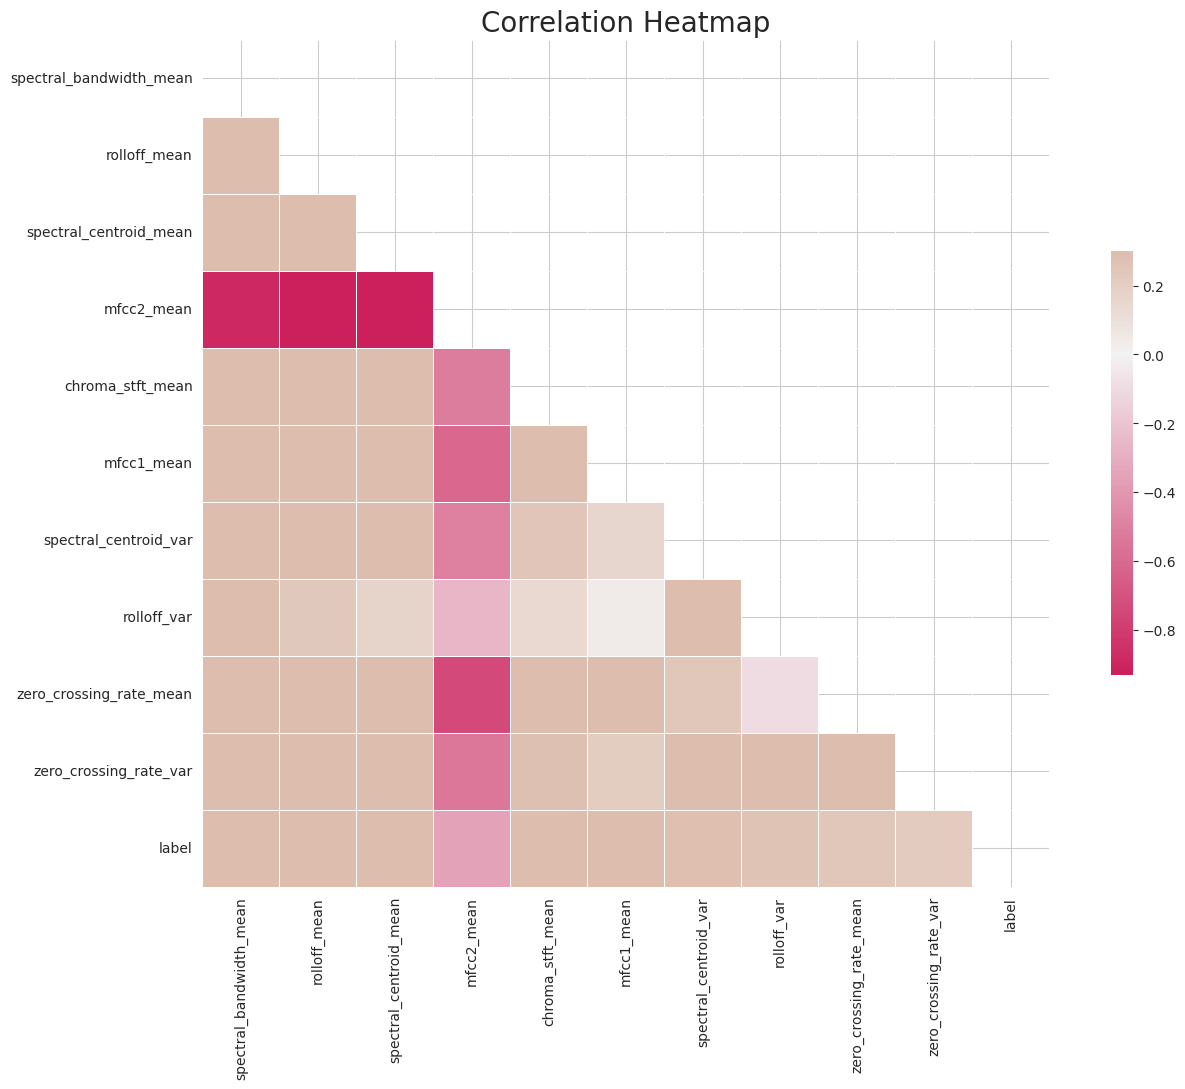

In [26]:
spike_cols = [col for col in ndf.columns]
corr = ndf[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

From the above correlation heatmap, we can infer that mfcc2_mean has somewhat strong correlation with the other variables whereas a really strong negative correlation exists between mfcc2_mean and spectral_bandwidth_mean, rolloff_mean and spectral_centroid_mean.

This indicates that:

1) The audio signals corresponding to higher MFCC2 values have more concentrated spectral content.

2) Most of the energy is concentrated at lower frequencies, causing a lower rolloff point.

3) Higher values of MFCC2 are associated with audio signals where the spectral content is concentrated around lower frequencies, leading to a lower spectral centroid.

# Feature Scaling & Data Splitting

In [27]:
X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=skp.StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

# Model Building & Training

In [28]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64)

y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Epoch 1/200
90/90 [==============================] - 2s 7ms/step - loss: 1.4690 - accuracy: 0.4968 - val_loss: 1.0276 - val_accuracy: 0.6324
Epoch 2/200
90/90 [==============================] - 0s 4ms/step - loss: 0.8926 - accuracy: 0.7010 - val_loss: 0.7666 - val_accuracy: 0.7373
Epoch 3/200
90/90 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.7704 - val_loss: 0.6886 - val_accuracy: 0.7776
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.8151 - val_loss: 0.6428 - val_accuracy: 0.7929
Epoch 5/200
90/90 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8503 - val_loss: 0.6007 - val_accuracy: 0.8103
Epoch 6/200
90/90 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.8708 - val_loss: 0.5947 - val_accuracy: 0.8165
Epoch 7/200
90/90 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.9002 - val_loss: 0.5410 - val_accuracy: 0.8409
Epoch 8/200
9

Following are the predictions on the test part of train.csv that we partitioned earlier,

In [29]:
print(y_pred)

[2 5 1 ... 5 9 5]


# Predicting on test.csv

In [30]:
tdf

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,66149,0.505255,0.074717,0.163630,0.002874,2400.403484,1.214451e+06,2504.768745,435455.640703,5095.915340,...,29.514904,-1.596965,31.212914,-3.638656,47.814972,-3.374476,35.619240,-2.141776,35.706924,4583
995,66149,0.441788,0.075458,0.126057,0.000848,2404.319614,1.693728e+05,2143.263729,76004.150528,4809.109638,...,30.936512,-8.983166,30.758400,4.631423,41.145515,-0.982899,33.679554,-3.411500,34.778164,6045
996,66149,0.209669,0.092197,0.045615,0.000233,2513.444580,1.737489e+04,1817.437810,12717.031917,4316.744666,...,26.008801,15.927879,27.391308,17.862923,38.844635,-11.587505,91.164101,-9.533628,79.951431,1897
997,66149,0.393056,0.079578,0.077266,0.000418,1965.229089,1.048652e+05,2072.314035,62326.933871,4110.771297,...,18.690699,-9.599170,22.972540,6.243433,28.810957,-7.491454,27.324255,0.586015,32.044926,3565


In [31]:
scaler=skp.StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(tdf),columns=tdf.columns)
test_data=test_data.drop('id',axis=1)

In [32]:
test_data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,-0.306959,-0.581467,-1.152406,-0.720916,0.017925,1.590464,1.097729,2.491983,0.244970,...,-0.387552,0.090395,-0.515565,0.066987,-0.711519,-0.812232,-0.743287,-0.155434,-1.930014,-0.371383
1,0.0,1.076163,0.336893,0.467902,1.037103,0.289306,0.224393,0.033778,0.278384,0.288944,...,0.452275,0.445884,-0.183358,-0.092536,0.724861,0.080897,0.110642,0.790069,0.519566,0.099506
2,0.0,-0.556874,-0.834013,0.913638,-0.517397,0.494978,-0.699836,0.482958,0.343288,0.475018,...,-0.870551,-0.410161,0.418526,-0.090967,-1.147857,-0.861164,0.152760,-0.531241,-0.175396,-0.390281
3,0.0,-0.855522,0.879061,-0.326813,-0.229577,-0.780047,-0.596832,-0.402730,-0.517122,-0.627782,...,-0.153129,0.261880,-0.541774,0.313277,1.166607,-0.693670,-0.396206,-0.145837,-0.625303,-0.544418
4,0.0,0.221721,0.656282,-0.043569,1.202132,-1.301221,-0.425690,-0.922384,1.010866,-1.116894,...,-0.136334,-0.044357,0.430458,0.047167,-0.534017,-0.273139,-0.166614,-0.193913,-0.249781,-0.586050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,1.366348,-1.039019,0.506146,0.101557,0.321290,1.938738,0.543911,3.195477,0.380039,...,-0.438619,-0.520421,0.526306,-0.527332,-0.820656,-0.103769,-0.169159,-0.471103,-0.232135,-0.473333
995,0.0,0.671331,-0.961200,-0.041117,-0.501859,0.326744,-0.562922,-0.148457,-0.424355,0.198321,...,-0.406961,-0.485588,-0.820687,-0.539139,0.805734,-0.286620,0.312255,-0.522383,-0.489102,-0.495309
996,0.0,-1.870569,0.796969,-1.212819,-0.685369,0.478718,-0.926767,-0.772490,-1.061683,-0.113639,...,1.743416,-0.606329,3.722245,-0.626601,3.407835,-0.349701,-1.822407,0.997358,-1.728099,0.573585
997,0.0,0.137670,-0.528534,-0.751794,-0.630152,-0.284759,-0.717337,-0.284342,-0.562090,-0.244142,...,0.868382,-0.785639,-0.933026,-0.741381,1.122751,-0.624787,-0.997890,-0.690401,0.319916,-0.559983


In [33]:
y_pred_probabilities = model.predict(test_data.values)
y_pred = y_pred_probabilities.argmax(axis=-1)

32/32 [==============================] - 0s 2ms/step


Following are the predictions on test.csv,

In [34]:
y_pred

array([9, 4, 7, 2, 0, 2, 6, 4, 3, 0, 3, 7, 6, 9, 9, 6, 1, 9, 5, 8, 3, 1,
       3, 2, 4, 2, 4, 8, 8, 8, 1, 4, 5, 5, 3, 5, 3, 1, 0, 2, 8, 4, 5, 9,
       7, 5, 3, 1, 0, 9, 8, 8, 9, 8, 1, 2, 1, 0, 1, 4, 6, 1, 0, 1, 2, 5,
       8, 9, 4, 8, 2, 8, 4, 8, 9, 0, 3, 7, 1, 3, 0, 7, 7, 0, 3, 8, 4, 4,
       2, 9, 2, 2, 6, 9, 4, 3, 3, 0, 0, 4, 5, 8, 3, 6, 5, 9, 0, 6, 6, 5,
       3, 7, 1, 6, 5, 5, 2, 1, 6, 6, 7, 4, 5, 0, 0, 9, 6, 6, 3, 2, 4, 9,
       2, 9, 6, 0, 3, 5, 4, 1, 4, 9, 2, 4, 8, 3, 5, 1, 8, 3, 9, 6, 2, 0,
       9, 2, 5, 3, 6, 0, 9, 9, 3, 7, 3, 2, 1, 9, 1, 2, 8, 2, 3, 2, 2, 3,
       0, 2, 1, 1, 5, 3, 6, 2, 0, 7, 5, 9, 8, 1, 1, 3, 4, 6, 7, 3, 9, 5,
       8, 5, 2, 8, 7, 0, 5, 6, 9, 4, 5, 0, 5, 4, 5, 8, 3, 3, 2, 9, 4, 8,
       9, 4, 5, 9, 7, 3, 9, 6, 3, 2, 7, 0, 0, 0, 4, 4, 5, 8, 1, 2, 4, 9,
       5, 4, 9, 2, 7, 2, 4, 0, 2, 8, 9, 7, 5, 1, 0, 2, 1, 4, 0, 5, 0, 4,
       8, 7, 9, 1, 5, 9, 9, 3, 7, 2, 9, 8, 3, 9, 3, 6, 5, 6, 8, 8, 2, 7,
       4, 7, 2, 6, 6, 7, 6, 8, 8, 9, 8, 1, 5, 4, 7,

# Comparing Baseline with Test Results

In [35]:
baseline = pd.read_csv('/kaggle/input/d/riarkulkarni/baseline/baseline.csv')
y_test = baseline['label']
baseline_accuracy = accuracy_score(y_test, y_pred)

In [36]:
baseline_accuracy

0.8588588588588588

# Processing Submission

In [37]:
submission = pd.DataFrame({'id': tdf1['id'], 'label': y_pred})

In [38]:
submission

,id,label
0,9586,9
1,6984,4
2,7047,7
3,2510,2
4,34,0
...,...,...
994,4583,4
995,6045,6
996,1897,1
997,3565,3


In [39]:
submission.to_csv('submission.csv', index=False)

# Additional Part: Analyzing How Correlated Features Affect Model Accuracy

In [40]:
correlation_matrix = df1.corr()
most_correlated = (correlation_matrix
                   .unstack()
                   .sort_values(ascending=False)
                   .drop_duplicates()
                   .head())

print("Most correlated variables:")
print(most_correlated)

Most correlated variables:
chroma_stft_mean         chroma_stft_mean          1.000000
rolloff_mean             spectral_centroid_mean    0.974266
spectral_bandwidth_mean  rolloff_mean              0.950979
                         spectral_centroid_mean    0.890171
rolloff_var              spectral_bandwidth_var    0.889320
dtype: float64


**Dropping rolloff_mean and label,**

In [44]:
columns_to_drop = ['label', 'rolloff_mean']

X = df1.drop(columns=columns_to_drop)

y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=skp.StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [45]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)
y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Epoch 1/100
90/90 [==============================] - 2s 7ms/step - loss: 1.5204 - accuracy: 0.4797 - val_loss: 1.0634 - val_accuracy: 0.6359
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.9196 - accuracy: 0.6936 - val_loss: 0.8144 - val_accuracy: 0.7172
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.7184 - accuracy: 0.7551 - val_loss: 0.7258 - val_accuracy: 0.7547
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.8109 - val_loss: 0.6979 - val_accuracy: 0.7672
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.8486 - val_loss: 0.6385 - val_accuracy: 0.7908
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8750 - val_loss: 0.5723 - val_accuracy: 0.8186
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 0.3366 - accuracy: 0.8954 - val_loss: 0.5964 - val_accuracy: 0.8138
Epoch 8/100
9

In [46]:
y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

57/57 [==============================] - 0s 2ms/step
Accuracy on the test set: 84.94%


**Dropping id and rolloff_mean,**

In [47]:
scaler=skp.StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(tdf),columns=tdf.columns)

columns_to_drop1 = ['id', 'rolloff_mean']

test_data=test_data.drop(columns_to_drop1,axis=1)

In [48]:
y_pred_probabilities = model.predict(test_data.values)
y_pred = y_pred_probabilities.argmax(axis=-1)

32/32 [==============================] - 0s 2ms/step


In [49]:
y_pred

array([9, 4, 7, 2, 8, 2, 6, 4, 3, 0, 3, 7, 6, 9, 9, 6, 1, 2, 5, 7, 8, 1,
       3, 2, 4, 6, 4, 3, 8, 8, 1, 8, 5, 1, 3, 5, 3, 1, 0, 2, 7, 4, 5, 9,
       7, 5, 3, 1, 0, 0, 8, 8, 0, 8, 1, 9, 1, 5, 1, 4, 6, 5, 0, 1, 2, 5,
       8, 9, 4, 8, 2, 8, 4, 8, 0, 0, 3, 7, 1, 3, 0, 7, 7, 0, 3, 8, 4, 4,
       8, 2, 2, 2, 6, 9, 4, 3, 3, 0, 0, 4, 5, 8, 3, 6, 5, 9, 0, 6, 6, 5,
       3, 7, 1, 6, 3, 5, 2, 1, 6, 6, 3, 4, 5, 0, 0, 9, 6, 6, 3, 3, 7, 9,
       2, 9, 6, 0, 3, 5, 4, 1, 4, 9, 2, 4, 9, 3, 5, 1, 3, 3, 9, 0, 2, 0,
       9, 2, 5, 3, 1, 0, 2, 9, 3, 7, 3, 2, 1, 9, 1, 7, 8, 2, 3, 2, 8, 3,
       0, 1, 1, 1, 5, 3, 6, 2, 1, 7, 5, 9, 8, 1, 1, 3, 4, 6, 7, 3, 3, 5,
       8, 5, 2, 3, 7, 8, 5, 6, 9, 4, 5, 0, 5, 4, 5, 2, 7, 3, 0, 9, 4, 8,
       9, 4, 5, 9, 7, 3, 3, 6, 3, 2, 7, 0, 0, 2, 4, 4, 5, 8, 1, 2, 4, 9,
       5, 5, 8, 2, 7, 9, 4, 0, 5, 8, 9, 7, 5, 1, 0, 2, 1, 4, 0, 5, 3, 4,
       8, 7, 9, 1, 5, 9, 9, 3, 7, 2, 9, 8, 3, 9, 3, 6, 5, 6, 8, 8, 9, 7,
       4, 7, 2, 6, 6, 7, 6, 9, 5, 9, 4, 1, 5, 4, 7,

In [50]:
baseline = pd.read_csv('/kaggle/input/d/riarkulkarni/baseline/baseline.csv')
y_test = baseline['label']
baseline_accuracy = accuracy_score(y_test, y_pred)

In [51]:
baseline_accuracy

0.8368368368368369

**Dropping label and spectral_centroid_mean,**

In [52]:
columns_to_drop = ['label', 'spectral_centroid_mean']

X = df1.drop(columns=columns_to_drop)

y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=skp.StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

57/57 [==============================] - 0s 2ms/step
0.7971095052807116


**Dropping id and spectral_centroid_mean,**

In [53]:
scaler=skp.StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(tdf),columns=tdf.columns)

columns_to_drop1 = ['id', 'spectral_centroid_mean']


test_data=test_data.drop(columns_to_drop1,axis=1)
y_pred_probabilities = model.predict(test_data.values)
y_pred = y_pred_probabilities.argmax(axis=-1)
baseline = pd.read_csv('/kaggle/input/d/riarkulkarni/baseline/baseline.csv')
y_test = baseline['label']
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy

32/32 [==============================] - 0s 2ms/step


0.7757757757757757

**Dropping label and rms_mean,**

In [54]:
columns_to_drop = ['label', 'rms_mean']

X = df1.drop(columns=columns_to_drop)

y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=skp.StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

57/57 [==============================] - 0s 2ms/step
0.7276264591439688


**Dropping id and rms_mean,**

In [55]:
scaler=skp.StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(tdf),columns=tdf.columns)

columns_to_drop1 = ['id', 'rms_mean']

test_data=test_data.drop(columns_to_drop1,axis=1)
y_pred_probabilities = model.predict(test_data.values)
y_pred = y_pred_probabilities.argmax(axis=-1)
baseline = pd.read_csv('/kaggle/input/d/riarkulkarni/baseline/baseline.csv')
y_test = baseline['label']
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy

32/32 [==============================] - 0s 2ms/step


0.7237237237237237

**Dropping label and spectral_centroid_var,**

In [56]:
columns_to_drop = ['label', 'spectral_centroid_var']

X = df1.drop(columns=columns_to_drop)

y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=skp.StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

y_pred_probabilities = model.predict(X_test)
y_pred = y_pred_probabilities.argmax(axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

57/57 [==============================] - 0s 2ms/step
0.8171206225680934


**Dropping id and spectral_centroid_var,**

In [57]:
scaler=skp.StandardScaler()
test_data=pd.DataFrame(scaler.fit_transform(tdf),columns=tdf.columns)

columns_to_drop1 = ['id', 'spectral_centroid_var']

test_data=test_data.drop(columns_to_drop1,axis=1)
y_pred_probabilities = model.predict(test_data.values)
y_pred = y_pred_probabilities.argmax(axis=-1)
baseline = pd.read_csv('/kaggle/input/d/riarkulkarni/baseline/baseline.csv')
y_test = baseline['label']
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy

32/32 [==============================] - 0s 2ms/step


0.8068068068068068

****************************************